<h4 align="right">by <a href="http://cs-people.bu.edu/usmn/"> Ben Usman</a> <br> with help of Kate Saenko, <br> Brian Kulis and Kun He <br><br>These solutions by Casey Fitzpatrick<br> </h4>

# Problem Set 1 


## Preamble

To run and solve this assignment, one must have a working IPython Notebook installation. The easiest way to set it up for both Windows and Linux is to install [Anaconda](https://www.continuum.io/downloads). Then save this file ([`pset1.ipynb`](https://gist.githubusercontent.com/MInner/eb6330a655a5c37b82e15d1c84fd4cd0/raw/)) to your computer, run Anaconda and choose this file in Anaconda's file explorer. Use `Python 3` version. Below statements assume that you have already followed these instructions. If you are new to Python or its scientific library, Numpy, there are some nice tutorials [here](https://www.learnpython.org/) and [here](http://www.scipy-lectures.org/).

To run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctr+Enter` or `[>|]`(like "play") button above. To edit any code or text cell [double]click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

We highly encourage students to put down their derivations into corresponding cells below. However, if one does not know LaTeX (and would find it too hard to learn it by looking at examples listed below between \$..\$), he or she might pass it in pen-and-paper format, however grading of these submissions might be delayed.

Put your solution into boxes marked with **`[double click here to add a solution]`** and press Ctr+Enter to render text. [Double]click on a cell to edit or to see its source code. You can add cells via **`+`** sign at the top left corner.

Submission instructions: please upload your completed solution file to Blackboard by the due date (see Schedule). If you have pen-and-paper answers, please hand them in in class on the same day. 

`Vector` stands for `column vector` below. Show all steps when proving statements.

### Problem 1: Closed-Form Maximum Likelihood

Assume that we are given $n$ iid samples $(x_1, ..., x_n)$ from each $P(x \ | \ \theta)$ below. Compute the maximum likelihood estimates (MLEs) for the parameter $\theta$ of given distributions. 

**Q1.1**: $P(x \ | \ \theta) = \theta e^{-\theta x}$ for $x \geq 0$

___Solution___

The MLE estimate for the paramter $\theta$ is given by

$$
\begin{align}
\arg\max_{\theta} P(x_1,\dots,x_n \ | \ \theta) &= \arg\max_{\theta} \prod_{i=1}^{n} P(x_i \ | \ \theta) \\ 
&= \arg\max_{\theta} \theta \exp{(-\theta x_1)} \theta \exp{(-\theta x_2)} \cdots \theta \exp{(-\theta x_n)} \\
&= \arg\max_{\theta} \theta^{n} \exp{(\theta \sum_{i=1}^{n} x_i)} \\
&= \arg\max_{\theta} \big( n \log{(\theta)} - \theta \sum_{i=1}^{n} x_i \big), \text{ for } x \geq 0.
\end{align}
$$

Then, taking the derivative with respect to $\theta$ in order to maximize, we have

$$
\frac{\partial P(x_1,\dots,x_n \ | \ \theta)}{\partial \theta} = 0 \iff \frac{n}{\theta} - \sum_{i=1}^{n} x_i = 0 \implies \\
\begin{align} \theta &= n\big(\sum_{i=1}^{n} x_i \big)^{-1} \\ &= \frac{1}{\text{mean}(x_1, ..., x_n)}\end{align}
$$

Clearly,

$$
\frac{\partial^2 \theta}{\partial \theta^2} = -\big( \frac{1}{n} \sum_{i=1}^{n} x_i \big)^{-2} < 0
$$

if $x_i \geq 0$. So we have a maximum, as required.

**Q1.2**: $P(x \ | \ \theta) = \frac{1}{\theta}$ for $ 0 \leq x \leq \theta$

___Solution___

This MLE is interesting. Since 

$$
\begin{align}
\arg\max_{\theta} P(x_1,\dots,x_n \ | \ \theta) &= \arg\max_{\theta} \prod_{i=1}^{n} P(x_i \ | \ \theta) \\
&= \big(\frac{1}{\theta}\big)^{n}\text{,}
\end{align}
$$

we have that

$$ \frac{\partial P(x_1,\dots,x_n \ | \ \theta)}{\partial \theta} \to 0$$

as

$$\theta \to \infty\text{.}$$

Thus, because $0 \leq x \leq \theta$, we want to choose $\theta_{\text{MLE}} = \max_{i}(x_1,\dots,x_n)$.

### Problem 2: Gradient for Maximum Likelihood Estimation

Sometimes, we can't find MLEs in closed-form, in this case, we can use an iterative scheme to solve resulting optimization problem $\theta_{MLE} = \arg\max P(x \ | \ \theta)$. First-order iterative schemes (e.g. Gradient Descent, Stochastic Gradient Descent, Nesterov Accelerated Gradient Descent) require gradient information at each visited point. Compute gradients for log-likelihood of the following model:

- we have $X \in \mathbf R^{n \times k}$ - constant data matrix, $\mathbf x_i$ - vector corresponding to a single data point
- $\theta$ is a $k$-dimensional (unknown) weight vector
- $\varepsilon \sim \text{Student}(v)$ is a $n$-dimensional (unknown) noise vector
- and we observe vector $\mathbf y = X\theta + \varepsilon$

Which means that
$$ P(y_i \ | \ \mathbf x_i, \theta, v) = \frac{1}{Z(v)} \Big(1 + \frac{(\theta^T \mathbf x_i - y_i)^2}{v}\Big)^{-\frac{v+1}{2}}$$

where $Z$ stands for a normalization constant that does not depend on $\theta$, and $v$ is a constant parameter.

Denote log-likelihood as $\mathcal L(\theta)$ and log-likelihood for a single sample $i$ as $\mathcal L_i(\theta) = \mathcal L(\theta \ | \ \mathbf x_i, y_i)$.

**Q2.1**: Find $\frac{\partial \mathcal L_i(\theta)}{\partial \theta}$.

___Solution___

$$
\begin{align}
\frac{\partial \mathcal L_i(\theta)}{\partial \theta} &= \frac{\partial}{\partial \theta} \log P(y_i \ | \ \mathbf x_i, \theta, v) \\
&= \frac{\partial}{\partial \theta}\left \{ -\log Z(v) - \frac{v+1}{2} \log \big( 1+ \frac{(\theta^{T}\mathbf x_i - y_i)^2}{v} \big) \right \} \\
&= -\frac{v+1}{v}\big( 1+ \frac{(\theta^{T}\mathbf x_i - y_i)^2}{v} \big)^{-1} (\theta^{T}\mathbf x_i - y_i)\mathbf x_i
\end{align}
$$

**Q2.2**: Check the result obtained in the previous section by coding an SGD for $\mathcal L(\theta)$ and plotting how function value changes as a function of a number of passed gradient steps. Try multiple learning rates (1e-1, 1e-3, 1e-6), explain the result. Consider $Z(v)=1$ and $v=4$ for plotting.

We marked places where you are expected to add/change your own code with **`## -- ! code required`** comment.

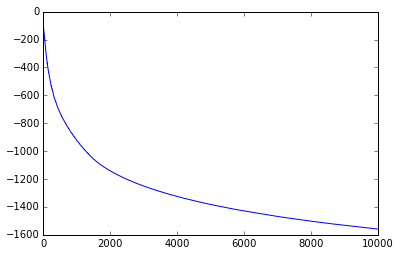

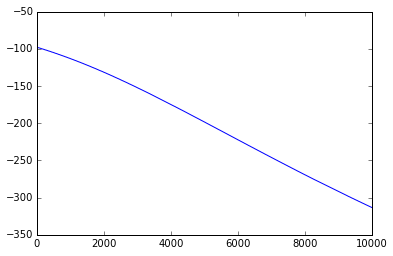

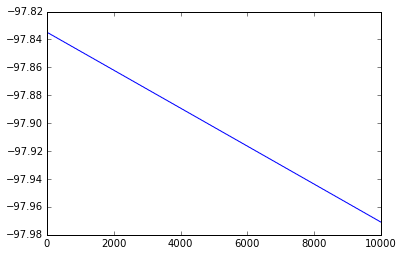

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def generate_data(n=100, k=10, v=4):
    X = np.random.rand(n, k)*2-1
    theta = np.random.rand(k, 1)
    noise = np.random.standard_t(4, n).reshape((-1, 1))
    return X, X @ theta + noise

def loss(X, y, theta):
    losses = -(4+1)/2 * np.log(1 + (X @ theta - y[:,0])**2 / 4)
    return np.sum(losses)

def loss_grad_i(X, y, theta, i):
    '''compute loss for given theta weight matrix as given by Q2.1 result'''
    v = 4
    const = -(v+1)/v
    x_i = X[i,:].T
    y_i = y[i]
    loss_grad = const * ((1 + ((theta.T @ x_i - y_i)**2)/v)**(-1)) * (theta.T @ x_i - y_i) * x_i
    return loss_grad

def sgd_plot(theta_init, X, y, n_steps=100):
    for learning_rate in [1e-1, 1e-3, 1e-6]:
        theta = theta_init[:]
        losses = []
        for step_n in range(n_steps):
            for i in range(X.shape[0]):
                try:
                    theta = theta[:,0] - learning_rate*loss_grad_i(X, y, theta, i)
                except IndexError:
                    theta = theta - learning_rate*loss_grad_i(X, y, theta, i)
                loss_i = loss(X, y, theta)
                losses.append(loss_i)

        plt.plot(losses)
        plt.show()
    
def main(n, k, v):
    X, y = generate_data(n, k, v)
    theta_init = np.random.rand(k, 1)
    sgd_plot(theta_init, X, y)
    
main(100,10,4)

___Solution___

The learning rates used are `1e-1`, `1e-3`, and `1e-6` from top to bottom. In other words, the learning rates decrease by a few orders of magnitude each time. This means that the gradient update is smaller and smaller, for each iteration, looking from top to bottom. That explains why the line _straightens_ out: the descent is taking smaller and smaller steps in each plot.

In the first plot, the steps are large enough such that we actually see some of the convexity of the loss function. However, by the bottom plot the steps are so small that we see only a small range of values of the loss function.

Another way to see this is to simply examine the range of y values in each case. Starting at the top plot we see a range of about 16 over all steps. This range is reduced to 3 in the middle plot, and hardly a few thousandths in the last plot.

Too small a learning rate wastes _a lot_ of computation time!

### Problem 3: Matrix Derivatives

**Q3.1: Multivariate Gaussian **

Assume that our data is distributed according to [multivariate Gaussian](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Likelihood_function) with $\bar \mu$ mean and $\Sigma$ covariance matrix: $$(\mathbf x_1, \dots, \mathbf x_n) \sim \mathcal N(\bar \mu, \Sigma).$$ 

Using rules of [matrix derivatives](http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3274/pdf/imm3274.pdf) [57, 59], get a $\frac{\partial \mathcal L(\theta)}{\partial \Sigma}$ in matrix form.

___Solution___

First, note that, for $\mathbf x_i \in R^{d}$

$$\mathcal L(\theta) = -\frac{1}{2} \big( \log \ | \ \Sigma \ | \ + \sum_{i=1}^{n} (\mathbf x_i - \mathbf \mu_i)^{T} \Sigma^{-1} (\mathbf x_i - \mathbf \mu_i) + d \log 2\pi\big)$$

Therefore,

$$
\begin{align}
\frac{\partial \mathcal L(\theta)}{\partial \Sigma} &= -\frac{1}{2} \big( \frac{\partial}{\partial \Sigma}\log \ | \ \Sigma \ | \ + \sum_{i=1}^{n}\frac{\partial}{\partial \Sigma} (\mathbf x_i - \mathbf \mu_i)^{T} \Sigma^{-1} (\mathbf x_i - \mathbf \mu_i) + 0 \big) ~ ~ ~ ~ ~\text{by linearity of derivative,} \\
&= -\frac{1}{2} \big( (\Sigma^{-1})^{T} + \sum_{i=1}^{n} \left \{ -\Sigma^{-T}(\mathbf x_i - \mathbf \mu)(\mathbf x_i - \mathbf \mu)^{T} \Sigma^{-T} \right \}\big) ~ ~ ~ ~ ~\text{by suggested cookbook equations,} \\
&= -\frac{1}{2} \big( \Sigma^{-1} - \sum_{i=1}^{n} \Sigma^{-1} (\mathbf x_i - \mathbf \mu)(\mathbf x_i - \mathbf \mu)^{T} \Sigma^{-1} \big) ~ ~ ~ ~ ~ ~\text{by symmetry of the covariance matrix.}
\end{align}
$$

**Q3.2: Multi-target Linear Regression**
- we have $X \in \mathbf R^{n \times k}$ is a constant data matrix
- $\theta$ is a $k \times m$-dimentional **weight matrix**
- $\varepsilon_{ij} \sim \mathcal N(0, \sigma_\epsilon)$ is a normal noise ($i \in [0; n], j \in [0;m]$)
- and we observe a matrix $Y = X\theta + \varepsilon \in \mathbf R^{n \times m}$

$$\varepsilon = Y - X\theta \sim \mathcal N_n(0, \sigma_\epsilon I)$$

$$\mathcal L(\theta) = \log P(Y - X\theta \ | \ \theta) = \log \mathcal N_n(Y - X\theta \ | \ 0, \sigma_\epsilon I)$$

$$\theta_{MLE} = \arg \max_{\theta} \mathcal L(\theta) = \arg \min_{\theta} \text{loss}(\theta) = \arg \min_{\theta} \big( ||Y-X\theta||^2_F \big)$$

In equations above $I$ stands for an identity matrix. **Using rules of [matrix derivatives](http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3274/pdf/imm3274.pdf)** [137, 132], show for an MLE loss:  $\text{loss}(\theta) = ||Y-X\theta||^2_F$ that:

**Q3.2.1:** $\frac{\partial\text{loss}(\theta)}{\partial \theta} = -2X^T(Y-X\theta)$

**Hint:** in our case [see Matrix Cookbook, eq. 137], $g(U) = ||U||^2_F$ - squared Frobenius norm and $U(\theta) = f(\theta) = Y - \theta X$ - linear mapping.

**Note:** That is a multi-target problem, so $\theta$ is a matrix, so you have to take the derivative wrt matrix.

___Solution___

My notation on this problem is a little shaky, so I'm going to explain the strategy before solving the problem and hopefully things will be clear.

We want to reframe the problem in terms of the matrix chain rule given in general form by equation 135 of the matrix cookbook. Then, using the explicit formulation of equation 137 we want to argue that derivative with respect to each element of the matrix $\theta$, denoted by $\theta_{ij}$, gives us an element-wise version of the result we're working towards. Then "vectorizing" that expression will give us full result.

Let 

$$U = Y - X\theta,$$

and 

$$g(U) = || Y - X\theta ||_{F}^{2} = \mathrm{Tr}\big[(Y - X)^{T}(Y - X)\big].$$

Then we can write $\frac{\partial\text{loss}(\theta)}{\partial \theta}$ as $\frac{\partial g(U)}{\partial \theta}$, and by cookbook equation 137 we have

$$
\begin{align}
\frac{\partial g(U)}{\partial \theta_{ij}} &= \mathrm{Tr}\big[ (\frac{\partial g(U)}{\partial U})^{T} \frac{\partial U}{\partial \theta_{ij}}\big] \\
&= \mathrm{Tr}\big[ 2U^{T}\frac{\partial U}{\partial \theta_{ij}}\big] \\
&= \mathrm{Tr}\big[ 2(Y-X\theta)^{T} \frac{\partial}{\partial \theta_{ij}}(Y-X\theta)\big] \\
&= \mathrm{Tr}\big[ 2(Y-X\theta)^{T} \frac{\partial}{\partial \theta_{ij}}(-X\theta)\big] \\
\end{align}
$$

Now, let's focus on the term

$$
\begin{align}
\frac{\partial}{\partial \theta_{ij}}(-X\theta) &= -\frac{\partial}{\partial \theta_{ij}}X\theta \\
&= -\frac{\partial}{\partial \theta_{ij}}
\begin{pmatrix}
    x_{11} & x_{12} & \cdots & x_{1k} \\
    \vdots & \vdots & \ddots &\vdots \\
    x_{n1} & x_{n2} & \cdots & x_{nk} \\
\end{pmatrix}
\begin{pmatrix}
    \theta_{11} & \theta_{12} & \cdots & \theta_{1m} \\
    \vdots & \vdots & \ddots &\vdots \\
    \theta_{k1} & \theta_{k2} & \cdots & \theta_{km} \\
\end{pmatrix} \\
&= -\frac{\partial}{\partial \theta_{ij}}
\begin{pmatrix}
    \sum_{l=1}^{k} x_{1l}\theta_{l1} & \cdots & \sum_{l=1}^{k} x_{1l}\theta_{l1} \\
    \vdots & \ddots &\vdots \\
    \sum_{l=1}^{k} x_{1l}\theta_{l1} & \cdots & \sum_{l=1}^{k} x_{1l}\theta_{l1} \\
\end{pmatrix} \\
&= -\big[x_{ip}\delta_{ij} \big]_{ij} \in R^{nxm}
\end{align}
$$

In other words, this matrix will be $nxm$ with __zeros everywhere except one column__, for which all entries will be $x_{ij}$ (in case that notation isn't quite right, that's what I mean... one column of $x_{ij}$ and all rest zero).

Knowing this, we turn our attention back to 

$$
\begin{align}
\frac{\partial g(U)}{\partial \theta_{ij}} &= \mathrm{Tr}\big[ 2(Y-X\theta)^{T} \frac{\partial}{\partial \theta_{ij}}(-X\theta)\big] \\
&= -\mathrm{Tr}\big[ 2(Y-X\theta)^{T} -\big[x_{ip}\delta_{ij} \big]_{ij} \big] \\
&= -2\mathrm{Tr}\big[ \sum_{l=1}^{n} (y_{lp} - x_{lp}\theta_{lp})\delta_{ij} x_{ij} \big] \\
&= -2\mathrm{Tr}\big[ (y_{ij} - x_{ij}\theta_{ij})x_{ij}\big] \\
&= -2(y_{ii} - x_{ii}\theta_{ii})x_{ii}
\end{align}
$$

This expression for $\frac{\partial g(U)}{\partial \theta_{ij}}$ can then be vectorized to give the result

$$
\frac{\partial g(U)}{\partial \theta_{ij}} \to \frac{\partial g(U)}{\partial \theta} = -2X^{T}(Y-X\theta),
$$

as required.

**Q3.2.2:** $\theta_{MLE} = (X^T X)^{-1} X^T Y$

___Solution___

By the result of Q3.2.1, $\theta_{MLE}$ is given by the $\theta$ that satisfies $\frac{\partial\text{loss}(\theta)}{\partial \theta} =0$.

So we have,

$$
\begin{align}
\frac{\partial\text{loss}(\theta)}{\partial \theta} =0 &\iff  \\
-2X^T(Y-X\theta) = 0 &\iff \\
X^{T} X \theta = X^{T} Y &\iff \\
\theta = (X^{T} X)^{-1} X^{T} Y\text{,}
\end{align}
$$

as required.

### Problem 4: Logistic Regression

Assume that we observe data generated via the following model:

- $X \in \mathbf R^{n \times k}$ - constant data matrix
- $\theta_j \sim \mathcal N(0, \sigma_\theta)$; $\theta$ is $k$-dimensional random vector
- $\varepsilon_i \sim \text{Logistic}(0, \sigma_\epsilon)$; $\varepsilon$ is $n$-dimensional random noise vector distributed according to [Logistic](https://en.wikipedia.org/wiki/Logistic_distribution) distribution
- and we observe $\mathbf y = \mathbf 1[X \theta + \varepsilon \geq 0]$ - boolean random vector

or, in other words: there exists some data $X$, we sample weights vector $\theta$ of the corresponding shape from multivariate normal distribution, multiply features from $X$ by weights from $\theta$, add random logistically distributed noise to resulting numbers, and observe whether resulting (noisy) random variable exceeds zero. So we are given the data matrix X and y, we want to estimate the weight vector $\theta$ as accurately as possible. 

Show that given model definition above, the following holds:

**Q4.1**: $ P(y_i = 1 \ | \ \theta, \mathbf x_i) = \text{logistic}\Big(\frac{\theta^T \mathbf x_i}{\sigma_\epsilon}\Big)$

 where $ \text{logistic}(x) := \frac{1}{1+\exp(-x)}$ is a standard [logistic function](https://en.wikipedia.org/wiki/Logistic_function#Mathematical_properties), $\mathbf x_i$ denotes $i$-th data sample vector, $\mathbf 1[\dots]$ denotes indicator function
 
 **Hints:** 
 
 - use same principle as presented in previous problem: $\varepsilon = Y - X\theta \sim \mathcal N_n(0, \sigma_\epsilon) \Rightarrow P(Y - X\theta = a) = \mathcal N_n(a \ | \ 0, \sigma_\epsilon I) = \dots$
 - for an event $A$, what is $P(\mathbf 1[A] = 1)$ ? (answer: $P(A)$)
 - for a random variable $\zeta \sim P$ what is $P(\zeta \leq a)$ ? (answer: $F_{\zeta}(a)$ - value of cumulative density function for the distribution of $\zeta$)

 ___Solution___
 
$$
\begin{align}
P(y_i = 1 \ | \ \theta, \mathbf x_i) &= P(\mathbf 1[\theta^{T} \mathbf x_i + \epsilon_i] = 1 \ | \ \theta, \mathbf x_i) \\
&= P(\epsilon_i \geq - \theta^{T} \mathbf x_i \ | \ \theta, \mathbf x_i) ~~~~ \text{since} ~~ P(\mathbf 1[A] = 1), \\
&= 1 - \text{logistic}(-\theta^{T} \mathbf  x_i) ~~~~~ \text{since} ~~ P(\zeta \leq a) = F_{\zeta}(a), \\
\end{align}
$$

Now, since $\text{Logistic}(0,\sigma_\epsilon)$ is symmetric about $0$,

$$
1 - \text{logistic}(-\theta^{T} \mathbf  x_i) =\text{logistic}(\theta^{T} \mathbf  x_i),
$$

which implies that

$$
\begin{align}
P(y_i = 1 \ | \ \theta, \mathbf x_i) &= \text{logistic}(\theta^{T}\mathbf x_i) \\
&= \frac{1}{1 + \exp(\frac{-\theta^{T}\mathbf x_i}{\sigma_{\epsilon}})},
\end{align}
$$

as required.

Let us consider $\sigma_{\epsilon} = 1$ everywhere further.

**Q4.1.1 (extra-bonus):** How would you expect training loss to behave for large and small values of $\sigma_{\epsilon}$? Look at how does norm of the gradient for points that are removed from spearation plane ($|\theta^T \mathbf x_i| \gg 0$) changes with $\sigma_{\epsilon}$?

___Solution___ (maybe)

Observation: as $\sigma_\epsilon \to 0$, $\text{logistic}(x)$ approximates a step function, $0$ for $x < 0$ and $1$ for $x \geq 0$. As $\sigma_\epsilon \to \infty$, $\text{logistic}(x)$ approximates a straight line with y-intercept at $0.5$ and x-intercept at $-\infty$.

Based on the above observation, it's clear that small values of $\sigma_\epsilon$ will lead to small gradient norms almost everywhere except for very close to zero, making gradient descent much less likely to converge most of the time, and possible explode if near zero!

For large $\sigma_\epsilon$ the gradient norm will be constant most of the time.

**Q4.2**: $ P(y_i \ | \ \theta, \mathbf x_i) = (\text{logistic}(\theta^T \mathbf x_i))^{y_i} (1-\text{logistic}(\theta^T \mathbf x_i))^{(1-y_i)}$

___Solution___

Starting with the result of Q4.1, namely that $P(y_i = 1 \ | \ \theta, \mathbf x_i) = \text{logistic}(\theta^{T}\mathbf x_i)$, we further note that the the outcomes $y_i \in \{0,1\}$ are Bernoulli-distributed.

Therefore,

$$ P(y_i = 1 \ | \ \theta, \mathbf x_i) = 1 - \text{logistic}(\theta^{T}\mathbf x_i,)$$

from which the result follows

$$ 
\begin{align}
P(y_i \ | \ \theta, \mathbf x_i) &= (\text{logistic}(\theta^T \mathbf x_i))^{y_i} (1 - \text{logistic}(\theta^T \mathbf x_i))^{1 - y_i} \\
&=\begin{cases}
\text{logistic}(\theta^T \mathbf x_i) &\text{if}\ y_i = 1 \\ 
1 - \text{logistic}(\theta^T \mathbf x_i) &\text{if}\ y_i = 0 \\ 
\end{cases}
\end{align}
$$

**Q4.3**: $ \log P(y_i \ | \ \theta, \mathbf x_i) = y_i \theta^T \mathbf x_i - \log(1 + \exp(\theta^T \mathbf x_i))$

___Solution___

First note that

$$
\frac{1}{1+ \exp(-x)} = \frac{\exp(x)}{\exp(x) + 1}
$$

and

$$
1 - \frac{x}{x + 1} = \frac{1}{1 + x}
$$

Thus,

$$
\begin{align}
\log P(y_i \ | \ \theta, \mathbf x_i) &= \log\big( (\frac{\exp(\theta^{T}\mathbf x_i)}{\exp(\theta^{T}\mathbf x_i) + 1})^{y_i} (\frac{1}{\exp(\theta^{T}\mathbf x_i) + 1})^{1 - y_i} \big) \\
&= y_i \theta^{T} \mathbf x_i - y_i \log(1 + \exp(\theta^{T}\mathbf x_i))) + (1 - y_i)(- \log(1 + \exp(\theta^{T}\mathbf x_i))) \\
&= y_i \theta^{T} \mathbf x_i - y_i \log(1 + \exp(\theta^{T}\mathbf x_i)) + y_i \log(1 + \exp(\theta^{T}\mathbf x_i)) - \log(1 + \exp(\theta^{T}\mathbf x_i))\\
&= y_i \theta^{T} \mathbf x_i - \log(1 + \exp(\theta^{T}\mathbf x_i)),
\end{align}
$$

as required.

The vector $\mathbf 1_{n \times 1}$ denotes column of ones.

**Q4.4**: $ \mathcal L_{MLE}(\theta) = \log P(\mathbf y \ | \ X, \theta) = y^T X \theta - \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta)) $

___Solution___

Using Q4.3, this result can be obtained by simply "vectorizing" the expression. It suffices to show that the the given expression in Q4.4 has the appropriate dimensions and that the dot products result in the appropriate sum over single-point loss calculations.

Let's consider each term separately.

First, $\log (y^T X \theta)$.

The expression $X\theta$ dots the weight vector with every data point, reulting in a $(nxk)(kx1) \to (nx1)$ matrix multiplication. This in turn is dotted with $y^{t} \in R^{1xn}$, a scalar that has summed this component of the loss funciton over all the data.

Now, consider $ - \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta))$.

As previously argued, $X\theta \in R^{nx1}$, so the expression $\mathbf 1_{n \times 1} + \exp(X \theta)$ has appropriate dimensions, and the $\log$ is interpreted as taking the log of each element in the resulting $(nx1)$ vector. Finally, that is dotted with the $(1xn)$ row vector $\mathbf 1_{n \times 1}^T$, which computes the appropriate sum over this component of the loss function, resulting in a scalar.

The two terms of the expression, then, reduce to a scalar minus another scalar, giving the scalar output required by a loss map.

The equation of Q4.4 then represents the vectorization of equation 4.3. Hooray!

One way of estimating true weight vector $\theta$ is by finding an MLE estimate. To make use of prior information,  one might want to find [maximum a posteriori estimation](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP) that can be derived from likelihood $P(X|\theta)$ and prior $P(\theta)$ over weights as following (Bayes rule):

$$
\begin{align}
\theta_{MAP} &= \arg\max_\theta P(\theta | X) = \arg\max_\theta \frac{P(X|\theta)P(\theta)}{\int_{\Theta} P(X|\theta)P(\theta) d \theta} = \arg\max_\theta \big[ \log P(X|\theta) + \log P(\theta) - \log \int_{\Theta} P(X|\theta)P(\theta) d \theta \big] \\ &= \arg\max_\theta \big[ \log P(X|\theta) + \log P(\theta) \big] = \arg\max_\theta \mathcal L_{MAP}(\theta)
\end{align}
$$

In the model definition above, normal prior over weights is specified by line $\theta_j \sim \mathcal N(0, \sigma_\theta)$, which essentially means that "weight vector components should not be too far from zero".

**Q4.5**: $\mathcal L_{MAP}(\theta) = \log P(\theta \ | \ X, \mathbf y) = y^T X \theta - \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta)) - \lambda \ ||\theta||^2_2 + C$

$\lambda = \frac{1}{2\sigma_\theta}$, $C$ - term that does not include $\theta$

___Solution___

Given the result of Q4.4 it suffices to show that 

$$\log P(\theta) = - \lambda \ ||\theta||^2_2 + C.$$

We know that $P(\theta)$ is a multivariate Gaussian $\theta)j \sim \mathcal N(0, \sigma_\theta)$, we have that

$$
\begin{align}
\log P(\theta) &= -\frac{1}{2}\big( \theta^{T}\sigma_{\theta}^{-1}\theta\big) - \log(\sqrt{2\pi\sigma^2}) \\
&= -\frac{1}{2\sigma_{\theta}}||\theta||^2_2 + C \\
&= - \lambda \ ||\theta||^2_2 + C
\end{align}
$$

**Q4.6**: $\frac{\partial \mathcal L_{MAP}(\theta)}{\partial \theta} = X^T(y - \text{logistic}(X\theta))) - 2 \lambda \theta $

___Solution___

There are four terms in $\mathcal L_{MAP}(\theta)$ on which the derivative $\frac{\partial}{\partial \theta}$ will act. We will consider them one by one (which is ok due to linearity of the derivative).

The last term, $C$, is independent of $\theta$ so will vanish.

The second to last term, $- \lambda \ ||\theta||^2_2$, under the action of $\frac{\partial}{\partial \theta}$, will, according to **cookbook equation 131**, go to $-2\lambda \theta$ as required.

The first term $y^T X \theta$ is simply $\frac{\partial}{\partial \theta} y^T X \theta =(y^{T}X)^{T} =  X^{T}y$, as can be seen by the tables in the [matrix calculus wiki](https://en.wikipedia.org/wiki/Matrix_calculus#Scalar-by-vector_identities) page.

Thus, it suffices to show that

$$ -\frac{\partial}{\partial \theta}\big( \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta))\big) = -X^{T}\text{logistic}(X\theta)$$

To do this, compute

$$
\begin{align}
\frac{\partial}{\partial \theta}\sum_{i=1}^{n} \log(1+ \exp(\theta^{T}\mathbf x_i)) &= \sum_{i=1}^{n} \frac{\exp(\theta^{T}\mathbf x_i)}{1 + \exp(\theta^{T}\mathbf x_i)}\mathbf x_i \\
&= \sum_{i=1}^{n}\mathbf x_i \frac{\exp(\theta^{T}\mathbf x_i)}{1 + \exp(\theta^{T}\mathbf x_i)}\mathbf x_i \\
\end{align}
$$

Putting the pieces together and left-factoring $X^{T}$ gives the result,

$$
\frac{\partial \mathcal L_{MAP}(\theta)}{\partial \theta} = X^T(y - \text{logistic}(X\theta))) - 2 \lambda \theta 
$$

The prior part of the likelihood ($||\theta||_2^2$) may also be interpreted as [Tikhonov regularizer](https://en.wikipedia.org/wiki/Tikhonov_regularization). When the problem is ill-posed, it might have multiple solutions, and regularizer lets us define which of them is more preferable ("with the smaller L2 norm - in our case") by modifying loss, and as a result, letting an iterative scheme converge better.

**Q4.7**: What does $\lambda$ stand for?

___Solution___

The $\lambda$ term is usually called the [regularization parameter](https://www.quora.com/What-is-regularization-in-machine-learning). It functions as a control against overfitting by penalizing complex models. In this case, overfitting and therefore penalization is measured by the squared L2 norm of the weight vector. Intuitively this makes sense, since an overfitting model has high variance which likely leads to a larger norm on the weight vector.

### Problem 5: Coding Logistic Regression

**Don't be scared by the size of the coding part!** If you find my code below horribly disgusting or amazingly incomprehensible (underscore one) and don't want to read it, you can skip most parts that do not have **`## ! -- code required`** comment in them and just execute the rest without reading. However, I highly encourage you not to do so, to fully dive into the Zen of Python Plotting (a very useful skill!). Some bonuses and my personal respect will be granted to those who will tweak the plotting code in the coolest way or show intersting extra results.

Here's the code that generates data according to model specification (**Problem 4**) and plots for `k_features=2`.

/Users/home/anaconda2/envs/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/Users/home/anaconda2/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


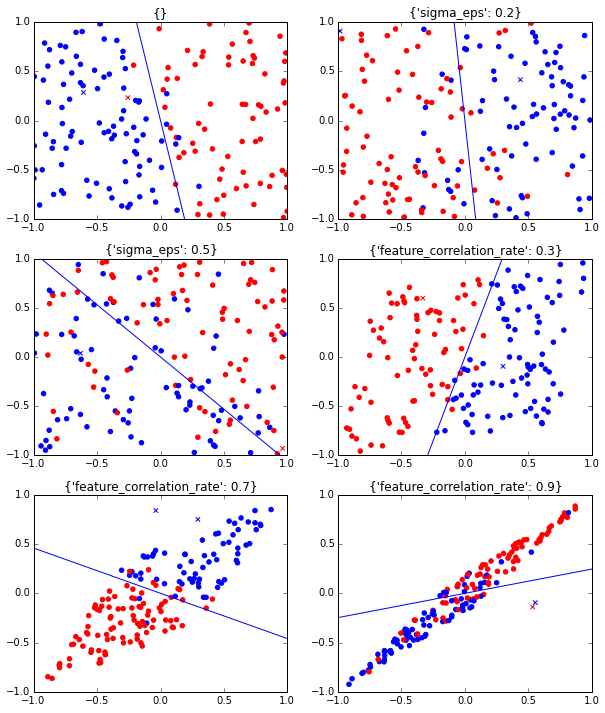

In [2]:
import numpy as np

def generate_logistic_regression_data(n_samples=200, k_featues=2, sigma_eps=0.1, 
                                      sigma_theta=1, feature_correlation_rate=0, train_test_ratio=4):
    assert 0 <= feature_correlation_rate <= 1
    X_noncorr = np.random.rand(n_samples, k_featues)*2-1 # [0, 1] -> [-1, 1] center around zero
    mixture_matrix = np.eye(k_featues)*(1-feature_correlation_rate) + feature_correlation_rate/k_featues
    X = X_noncorr @ mixture_matrix
    theta_real = np.random.normal(scale=sigma_theta, size=k_featues).reshape((-1, 1)) # column
    noise = np.random.logistic(scale=sigma_eps, size=n_samples).reshape((-1, 1))
    y = ((X @ theta_real + noise) > 0).astype(np.int16).reshape((-1, 1))
    split_idx = int(n_samples * train_test_ratio / (train_test_ratio + 1))
    return X[:split_idx, :], y[:split_idx], X[split_idx:, :], y[split_idx:], theta_real

def plot_2d_data(subfig, X, y, X_test, y_test, theta):
    assert len(X.shape) == 2
    subfig.scatter(X[:, 0], X[:, 1], color = [['r', 'b'][c] for c in np.ravel(y)])
    point_color_arr = [['r', 'b'][c] for c in np.ravel(y_test)]
    subfig.scatter(X_test[0], X_test[1], marker='x', color = point_color_arr)
    subfig.plot((1, -1), (-theta[0]/theta[1], theta[0]/theta[1]))
    subfig.set_xlim(-1, 1)
    subfig.set_ylim(-1, 1)
    
def subfig_iter(it, val_name=None, n_col=2, base_size=(10,2), title=None, fmt='%s'):
    n_rows = int(len(it)/n_col) + len(it) % n_col
    size = (base_size[0], base_size[1]*len(it))
    fig, _axes = plt.subplots(n_rows, n_col, figsize=size)
    for subfig, val in zip(np.ravel(_axes).tolist(), it): 
        yield (val, subfig)
        if val_name is not None:
            if val_name == '':
                subtitle = fmt % (val)
            else:
                subtitle = ('%s = '+fmt) % (val_name, val)
            subfig.set_title(subtitle)
            subfig.legend(loc='best')
    if title is not None:
        fig.suptitle(title, verticalalignment='top') 

def test_draw():
    data_args_dicts = [
        dict(), {'sigma_eps': 0.2}, {'sigma_eps': 0.5}, {'feature_correlation_rate': 0.3}, 
        {'feature_correlation_rate': 0.7}, {'feature_correlation_rate': 0.9},
    ]
    for arg_dict, subfig in subfig_iter(data_args_dicts, val_name=''):
        data = generate_logistic_regression_data(**arg_dict)
        X_train, y_train, X_test, y_test, theta_real = data
        plt.title(str(arg_dict))
        plot_2d_data(subfig, X_train, y_train, X_test, y_test, theta_real)
        
    plt.show()

test_draw()

**Q5.1.1**: When we use `feature_correlation_rate` ($\alpha$) the following happens: we construct a matrix $M$ that has values $1 - \frac{n-1}{n}\alpha$ on the diagonal and values $\frac{\alpha}{n}$ everywhere else. What happens to resulting matrix $MX$ if $\alpha$ is either 0 or 1?

___Solution___

* $\alpha=0 \implies M = \mathbf{1} $, the identity matrix.
* Since $1- \frac{n-1}{n} = \frac{1}{n}$, we have that $\alpha=1 \implies M=\frac{1}{n}\mathbf{1}$.

**Q5.1.2**: Explain what happens in this line (use `numpy` documentation to learn about [transposition](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.T.html), [broadcasting](https://docs.scipy.org/doc/numpy-dev/user/basics.broadcasting.html), [negative indices](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html#automatic-reshaping) for reshaping and [newaxis](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#basic-slicing-and-indexing))

    y = ((theta_real.T @ X + noise) > 0).astype(np.int16).reshape(-1, 1)

___Solution___

Mathematically, the above line creates a boolean column vector whose $i^{\text{th}}$ entry correspond to whether (`1`) or not (`0`) the expression $\theta^{T}\mathbf{x_i}+\epsilon_{i} > 0$.

In terms of `numpy`, this happens as follows:
1. `(theta_real.T @ X + noise)` dots the weight vector with all of the data via the dot operator `@`, after which the noise vector `epsilon` is added element-wise to the result. The transpose method `.T` is called on `theta_real` so that the inner dimension of `theta_real.T` matches the outer dimension of `X` as required by the rules of matrix multiplication. 
2. Then, through the majesty of numpy, the comparison operator `>` automatically broadcasts the integer `0` to match the dimensionality of the multiplication in step 1. This creates the boolean vector.
3. Finally, the `.astype()` method converts the elements to `numpy.int16` datatypes (compact and efficient), before `.reshape(-1,1)` enforces the column vector shape `(,1)` by "subtracting" the $0^{\text{th}}$ dimension.

**Q5.1.3**: Why do we plot line $( (1, -\frac{\theta_0}{\theta_1}) ; (-1, \frac{\theta_0}{\theta_1}))$?

___Solution___

The line represents the [decision boundary](https://en.wikipedia.org/wiki/Decision_boundary) that separates the two classes in this binary classification problem. (The boundary is a property of the model, of course, not the true classes. So it may incorrectly partition the space of the data, as we can see in many instances above.)

**Q5.2**: Why did we implement $\text{softplus}(x) = \log(1+\exp(x))$ as shown below? What is numerical under- and overflow and how people deal with it?

___Solution___

#### Softplus

The softplus implementation below applies a mask, in order to avoid underflow (explained below). The softplus function is in general susceptible especially to underflow. For example $\text{softplus}{(-100)} \propto 10^{-44}$. The mask in the implementation creates a threshold.


#### Numerical Overflow and Underflow

The terms overflow and underflow correspond to situations where some operation generates a number too big or small, respectively, to be stored in memory.

For example, in the case of 16-bit unsigned integers, $0$ is the smallest number representable and $65535$ is the largest. So one way to deal with any calculation resulting in an integer outside of the set $[0,65535]$ would be to convert the result once an over/underflow condition is met: to $0$ if negative and to $65535$ if greater than $65535$.

Analagous situations apply to signed, and floating point numbers. Depending on the datatype there are many approaches to dealing with the situation, such as assigning special values, raising exceptions, forcing harware interrupts, and replacing as mentioned above. Some sources consulted: [wiki underflow](https://en.wikipedia.org/wiki/Arithmetic_underflow), [wiki overflow](https://en.wikipedia.org/wiki/Arithmetic_overflow), [matlab forum](https://www.mathworks.com/matlabcentral/answers/223688-what-is-underflow-and-overflow).

In [3]:
import numpy as np

def softplus(x_, limit=5):
    x = np.array(x_)
    compute_real_mask = np.logical_and(-limit < x, x < limit)
    return_same_mask = x >= limit
    computed_real_part = np.log(1 + np.exp(x*compute_real_mask)*compute_real_mask)
    returned_same_part = x*return_same_mask
    return computed_real_part + returned_same_part

def test_softplus():
    x_arr = np.linspace(-200, 200)
    softplus_true = np.log(1 + np.exp(x_arr))
    softplus_stable = softplus(x_arr)
    assert np.max(abs(softplus_true-softplus_stable)) < 1e-3
    
test_softplus()

def logistic(x):
    return 1/(1+np.exp(-x))

**Q5.3**: Write (by filling in the missing code below) Gradient Descent and Stochastic Gradient Descent algorithm for the MAP loss and plot 

- MAP loss
- L2 distance between current theta and true one
- cosine distance between current theta and true one

use results from **Q4.6, Q4.7**. Note that our loss is $loss(\theta) = -\mathcal L(\theta)$ and it is usually referred as "the negative log-likelihood".

In [4]:
from numpy.linalg import norm
from scipy.spatial.distance import cosine
import matplotlib.cm as cm

def logistic_MAP_loss(X, y, theta_current, lambd):
    '''Calculates negative log loss of logistic '''
    one_vec = np.ones((X.shape[0],1))
    reg = lambd*(theta_current.T @ theta_current) # + C ?
    loglik = (y.T @ X @ theta_current) - (one_vec.T @ np.log(one_vec + np.exp(X @ theta_current))) - reg
    return -np.sum(loglik) # negative log likelihood

def logistic_MAP_loss_gradient(X, y, theta_current, lambd):
    '''Calculates graient of negative log loss, vectorized.'''
    return - (X.T @ (y - logistic(X @ theta_current)) - 2*lambd*theta_current) # carry that minus sign baby!

def logistic_MAP_loss_single_gradient(X, y, smaple_id, theta_current, lambd):
    x_i = X[smaple_id].reshape((1, -1))
    y_i = y[smaple_id].reshape((1, 1))
    return logistic_MAP_loss_gradient(x_i, y_i, theta_current, lambd)

def logistic_classification_accuracy(X, y, theta_current):
    '''Calculates model accuracy for binary logistic regression: mean of correct classifications.'''
    result = np.round(logistic(X @ theta_current))
    return   np.mean(result == y)

def run_MAP_gd(X, y, lambd, learning_rate = 0.01, max_epoch_n=200, init_theta=None):
    theta = init_theta if init_theta is not None else np.ones((X.shape[1], 1))*5
    steps = []
    for epoch_n in range(max_epoch_n):
        grad_theta = logistic_MAP_loss_gradient(X, y, theta, lambd)
        theta = theta - learning_rate * grad_theta
        steps.append(theta)
    return steps

def run_MAP_sgd(X, y, lambd, learning_rate = 0.01, max_epoch_n=200, init_theta=None):
    '''Runs SGD, iterating over minibatches of size one, each data point, and using the value of the gradient as the update step.'''
    theta = init_theta if init_theta is not None else np.ones((X.shape[1], 1))*5
    steps = []
    for epoch_n in range(max_epoch_n):
        for smaple_id in range(X.shape[0]):
            grad_theta_i = logistic_MAP_loss_single_gradient(X, y, smaple_id, theta, lambd)
            theta = theta - learning_rate * grad_theta_i
        steps.append(theta)
    return steps

k_features = 2
gd runtime: 0.1319889999999999
gd ran
sgd runtime: 1.9966679999999997
sgd ran


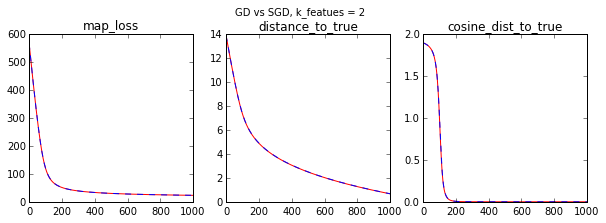

k_features = 100
gd runtime: 0.11073299999999975
gd ran
sgd runtime: 2.0320089999999995
sgd ran


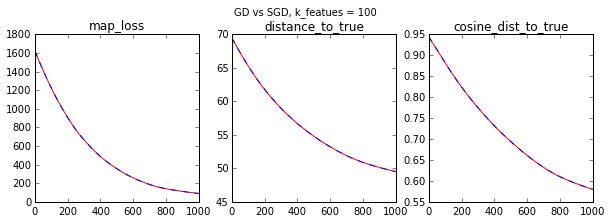

In [5]:
import time
def draw_gd_plots(axes, theta_steps, X, y, lambd, theta_real, style='k-'):
    collected_val_dicts = []
    for theta in theta_steps:
        collected_val_dicts.append({
                'distance_to_true': np.linalg.norm(theta-theta_real),
                'cosine_dist_to_true': cosine(theta, theta_real),
                'map_loss': float(logistic_MAP_loss(X, y, theta, lambd)),
            })
        
    
    for plot_id, key in enumerate(collected_val_dicts[0].keys()):
        subfig = axes[plot_id]
        subfig.set_title(key)
        subfig.plot(list(d[key] for d in collected_val_dicts), style)

def main():
    for k_featues in [2, 100]:
        print('k_features = {}'.format(k_featues))
        data_args = {'n_samples': 200, 'k_featues': k_featues, 'sigma_eps': 0.3, 
                     'sigma_theta': 5, 'feature_correlation_rate': 0}
        data = generate_logistic_regression_data(**data_args)
        X_train, y_train, X_test, y_test, theta_real = data
        fig, axes = plt.subplots(1, 3, figsize=(10,3))
        lamdb = 0
        
        now = time.clock()
        steps = run_MAP_gd(X_train, y_train, lamdb, learning_rate=1e-3, max_epoch_n=1000)
        draw_gd_plots(axes, steps, X_train, y_train, lamdb, theta_real, style='r-')
        print('gd runtime:', time.clock() - now)
        print('gd ran')
        
        now = time.clock()
        steps = run_MAP_sgd(X_train, y_train, lamdb, learning_rate=1e-3, max_epoch_n=1000)
        draw_gd_plots(axes, steps, X_train, y_train, lamdb, theta_real, style='b--')
        fig.suptitle('GD vs SGD, k_featues = %d' % k_featues, verticalalignment='bottom')
        print('sgd runtime:', time.clock() - now)
        print('sgd ran')
        
        plt.show()
    
main()

#### **Q5.3.1**: We expect loss to gradually decrease. Re-run code above several times (sgd might work differently). Explain plots above.

___Solution___

Surprisingly, the SGD performance tracks the GD performance very well, indistinguishably at the scale of the plot, as indicated by the overlapping dashed lines.

It is interesting that when `k_features = 2`, the loss occaisionally levels at (presumably at a local minimum) or sometimes even increases after a certain point. In the case of `k_features = 100`, however, this never happens, at least that I've seen testing many values. The loss always converges towards zero. This is most likely due to the fact that more features provides more samples for teh gradient computation, resulting in an increased probability of convergence.

When the loss does does converge towards zero, the cosine similarity and the L2 distance between the learned theta and the true theta also tend to converge towards zero, indicating zero distance (or, complete similarity) between the learned and true parameters under these metrics. Sometimes though, the L2 distance increases even while the cosine similarity hovers near zero. It's not immediately clear to me why this happens.


**Q5.4**: Complete the provided code below, and use it to draw several contour plots of logistic loss with different regularization parameter. Explain your results.

/Users/home/anaconda2/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Users/home/anaconda2/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


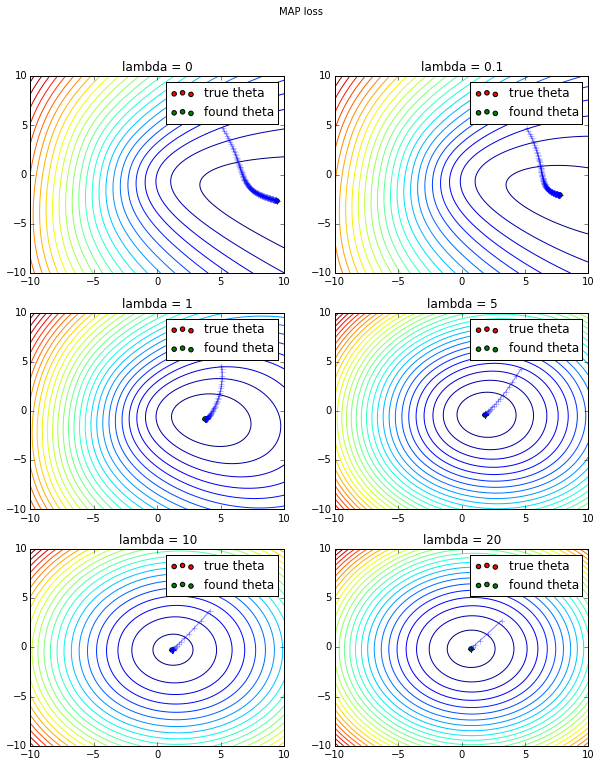

In [6]:
from itertools import product

def draw_f_contour(subfig, f, x_limits, n_lines=30, n=100):
    space = [np.linspace(*x_limit, n) for x_limit in x_limits]
    #print([v for v in product(*space)])
    f_vals = np.array([f(np.array(v)) for v in product(*space)]).reshape(n, n).T
    subfig.set_xlim(*x_limits[0])
    subfig.set_ylim(*x_limits[1])
    subfig.contour(*space, f_vals, n_lines)
    
def draw_gd_steps(subfig, steps, func, theta_real):
    around_space = list([-10, 10] for coord in theta_real)
    draw_f_contour(subfig, func, around_space)
    subfig.plot(np.hstack(steps)[0], np.hstack(steps)[1], marker='+', alpha=0.5)
    subfig.scatter(*np.ravel(theta_real), c='r', label='true theta')
    theta_best = steps[-1]
    subfig.scatter(*np.ravel(theta_best), c='g', label='found theta')

def main():
    data_args = dict(n_samples=200, k_featues=2, sigma_eps=0.1, sigma_theta=5)
    data = generate_logistic_regression_data(**data_args)
    X_train, y_train, X_test, y_test, theta_real = data
    lambds = [0, 0.1, 1, 5, 10, 20]
    for lambd, subfig in subfig_iter(lambds, val_name='lambda', title='MAP loss'):
        #cropped_xy = (X_train[:100], y_train[:100])
        steps = run_MAP_gd(X_train, y_train, lambd)
        draw_func = lambda theta: logistic_MAP_loss(X_train, y_train, theta, lambd).astype(np.float64)
        #steps = run_MAP_gd(X_train, y_train, lambd)
        #draw_func = lambda theta: logistic_MAP_loss(X_train, y_train, theta, lambd) ## ! -- code required
        draw_gd_steps(subfig, steps, draw_func, theta_real)
    plt.show()

main()

___Solution___

Large $\lambda$ values (high regularization penalties) cause the objective function solution to tend towards an ideal, uniform convecity structure. This can be seen from the increasing degree of circular symmetry in the contours as $\lambda$ increases. Sure, the model isn't overfitting, but for $\lambda$ too large the model will begin to underfit. The model is __overcontrained__. On the flip side, when $\lambda$ is too small the model could become underconstrained, although this exmaple looks ok. The sweet spot is typically somewhere in the middle, for exmaple maybe $\lambda=1$ in this example.

Note also that for large $\lambda$ values the gradient descent converges faster. This intuitively makes sense because the complexity of the objective is minimized, so that gradient descent is essentially traversing a _bowl_, as opposed to say, a _rocky mountain_.

**Q5.5**: Using the provided code below, draw several contour plots of logistic loss with different number of used samples. Explain your results.

/Users/home/anaconda2/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Users/home/anaconda2/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


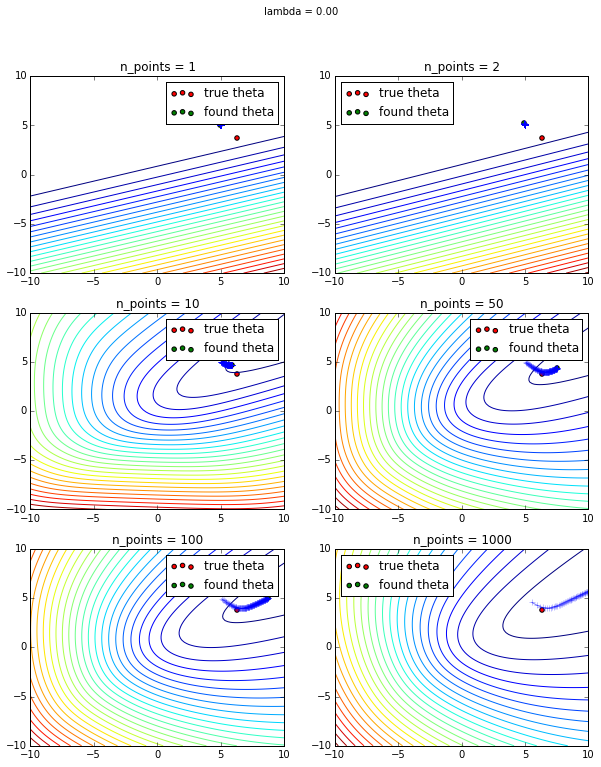

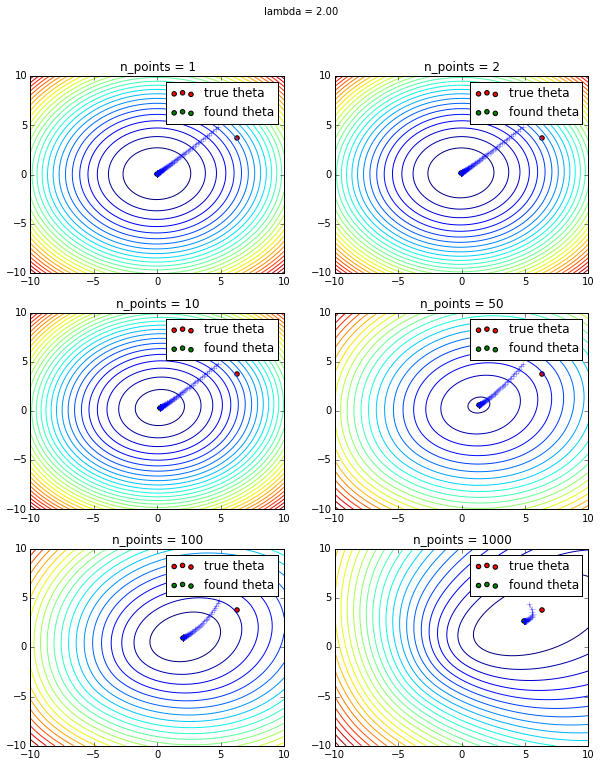

In [7]:
def main():
    data_args = dict(n_samples=1000, k_featues=2, sigma_eps=0.1, sigma_theta=3)
    data = generate_logistic_regression_data(**data_args)
    X_train, y_train, X_test, y_test, theta_real = data

    for lambd in [0.0, 2.0]:    
        n_points_s = [1, 2, 10, 50, 100, 1000]
        figure_args = dict(val_name='n_points', title='lambda = %.2f' % lambd)
        for n_points, subfig in subfig_iter(n_points_s, **figure_args):
            cropped_xy = (X_train[:n_points], y_train[:n_points])
            steps = run_MAP_gd(*cropped_xy, lambd)
            draw_func = lambda th: logistic_MAP_loss(*cropped_xy, th, lambd)
            draw_gd_steps(subfig, steps, draw_func, theta_real)
        plt.show()
        
main()

___Solution___

With too few data points to train on and __no regularization included__ (as in the $\lambda=0$ case above), gradient descent probably won't find a unique solution, as indicated by the top left plot. This problem persists but the effect lessens as the number of samples increases. By the time we're looking at 1000 samples, gradient descent has enough information to fine a local minimum.

With too few data points to train on and __regularization included__ (as in the $\lambda=2$ case above), the regularization overwhelms the model and we see "ideal" (approaching circularly symmetric) case that resulted in Q5.4. As the number of samples increases, the contours eventually become more elliptical, as in the `n_points=1000` case on the bottom right. But it takes many samples to overcome the regularization!

**Q5.6**: Using the provided code below, draw several contour plots of logistic loss with different degrees of feature interdependence. Explain your results.

/Users/home/anaconda2/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Users/home/anaconda2/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


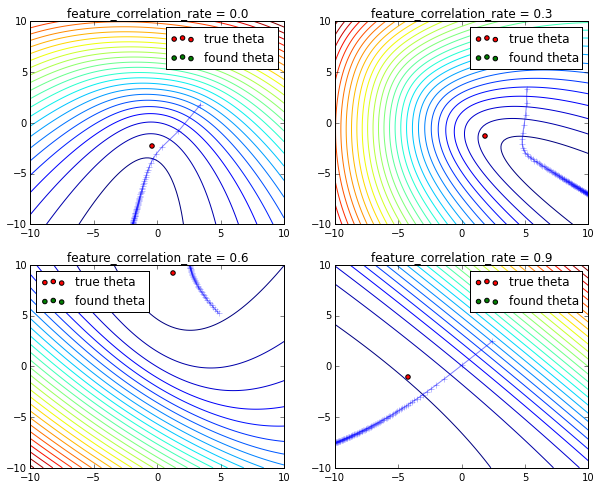

In [8]:
def main():
    rates = np.linspace(0, 0.9, 4)
    for feature_correlation_rate, subfig in subfig_iter(rates, val_name='feature_correlation_rate'):
        data_args = dict(n_samples=1000, k_featues=2, sigma_eps=0.1, sigma_theta=3)
        data_args['feature_correlation_rate'] = feature_correlation_rate
        data = generate_logistic_regression_data(**data_args)
        X_train, y_train, X_test, y_test, theta_real = data
        steps = run_MAP_gd(X_train, y_train, 0)
        draw_func = lambda th: logistic_MAP_loss(X_train, y_train, th, 0)
        draw_gd_steps(subfig, steps, draw_func, theta_real)
    plt.show()

main()

___Solution___

As the feature correlation rate increases, the model again becomes underconstrained and we get a worse objective, as evident by the `feature_correlation_rate = 0.9` case in the bottom right. This is because highly correlated features lead to a situation where adding extra dimensions (exrtra features) doesn't lead to more information. It's no surprise then that the `feature_correlation_rate = 0.9` case in the bottom moves in a straight line, because the gradient information is redundant in any more dimensions than one. Note the similarity between the bottom right plot in this figure and the top left plot in the Q5.5 figure: it's _as if_ there's only one data point!

**Q5.7**: Using the provided code below, draw plots of train\test loss with different parameters. Explain your results.

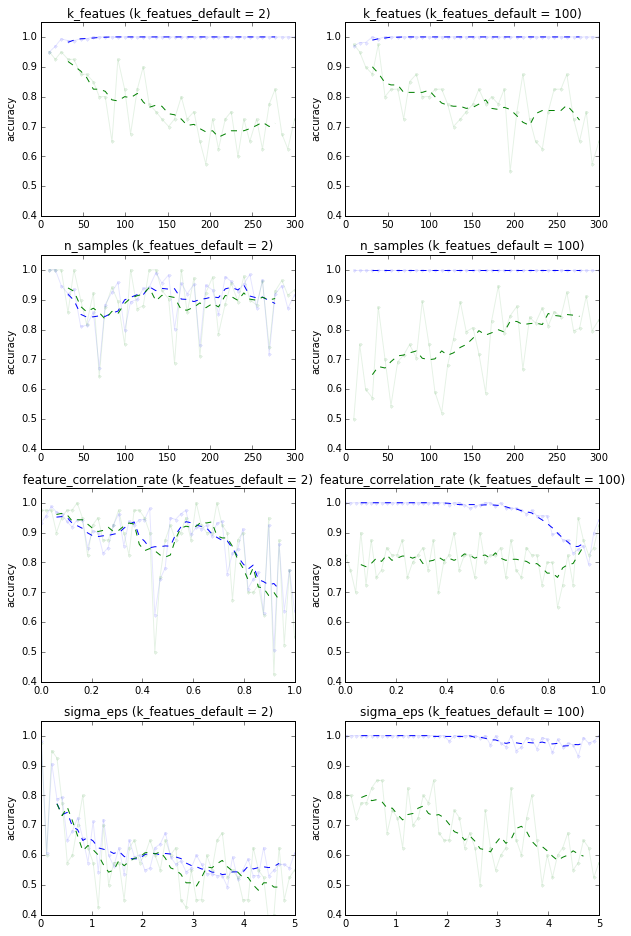

In [9]:
from collections import OrderedDict

def draw_losses():
    arg_ranges = OrderedDict([
        ('k_featues', np.linspace(10, 300, 40).astype(int)),
        ('n_samples', np.linspace(10, 300, 40).astype(int)),
        ('feature_correlation_rate', np.linspace(0, 1, 50).astype(float)),
        ('sigma_eps', np.linspace(0.01, 5, 50).astype(float)),
    ])

    k_range = [2, 100]
    l2_lambda = 0
    overall_iterator = subfig_iter(list(product(arg_ranges.items(), k_range)), n_col=2)
    for ((arg_name, arg_vals), k_featues_default), subfig in overall_iterator:
        collected_val_dics = []
        for arg_val in arg_vals:
            data_args = dict(n_samples=200, k_featues=k_featues_default, sigma_eps=0.1, 
                             sigma_theta=1, feature_correlation_rate=0, train_test_ratio=4)
            data_args.update({arg_name: arg_val})
            data = generate_logistic_regression_data(**data_args)
            X_train, y_train, X_test, y_test, theta_real = data
            init_theta = np.zeros((data_args['k_featues'], 1))
            
            gd_args = dict(max_epoch_n=100, init_theta=init_theta)
            steps = run_MAP_gd(X_train, y_train, l2_lambda, **gd_args)
            best_theta = steps[-1]
            
            train_acc = logistic_classification_accuracy(X_train, y_train, best_theta)
            test_acc = logistic_classification_accuracy(X_test, y_test, best_theta)
            collected_val_dics.append(
                OrderedDict([
                    ('train_acc', train_acc),
                    ('test_acc', test_acc)
                ]))

        for key, color in zip(collected_val_dics[0].keys(), ['b', 'g']):
            subfig.set_title('%s (k_featues_default = %s)'%(arg_name, k_featues_default))
            track_vals = list(d[key] for d in collected_val_dics)
            subfig.plot(arg_vals, track_vals, marker='.', label=key, color=color, alpha=0.1)
            ws = 7
            assert ws % 2 == 1
            half_ws = int((ws-1)/2)
            track_vals_avg = np.convolve(track_vals, np.ones(ws)/ws, mode='valid')
            plot_args = dict(color=color, label=key+'_avg')
            subfig.plot(arg_vals[half_ws:-half_ws], track_vals_avg, '--', **plot_args)
            subfig.set_ylim(0.4, 1.05)
            subfig.set_ylabel('accuracy')
    plt.show()

draw_losses()

___Solution___

First note that in all plots, blue corresponds to training and green corresponds to testing values.

In general, this figure illustrates the effects on performance of many of the points made previously in Q5.

__`k_features`__

The training accuracy remains relatively high and independent of the number of features, but the test accuracy descrease as the number of feautres increases. Noting that `l2_lambda = 0` this makes sense, because the model is overfitting.

__`n_samples`__

The average training and testing accuracy for `k_features_default = 2` is also pretty steady, with the exception of very small numbers of smaples. This makes sense because a binary classification with `2` features and a small train and test test has a pretty good chance of getting it right accidentally. 

In the case of `k_features_default = 100` the performance is much more realted to the training sample size, for the same reasons argued in Q5.5. The model needs more samples to find a good objective!

__`feature_correlation_rate`__

For `k_features_default = 2`, the performance is again usually relatively constant, perhaps because the probability of accidentally getting it right in a 2 class classification with 2 features is high.

For `k_features_default = 100`, the model overfits (high training accuracy), but usually decreases in accuracy as correlation goes up.

__`sigma_eps`__

As noted in the bonus question Q4.1.1, large $\sigma_\epsilon$ will lead to a constant norm gradient, which may cause cause gradient descent to miss minima and therefore lead to poor performance, as indicated by the plots.


Wow, you made it this far, that is impressive. Congratulations!